In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/content/Summer-Olympic-medals-1976-to-2008.csv',sep=',',  encoding='latin-1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [5]:
df.shape

(15433, 11)

In [6]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

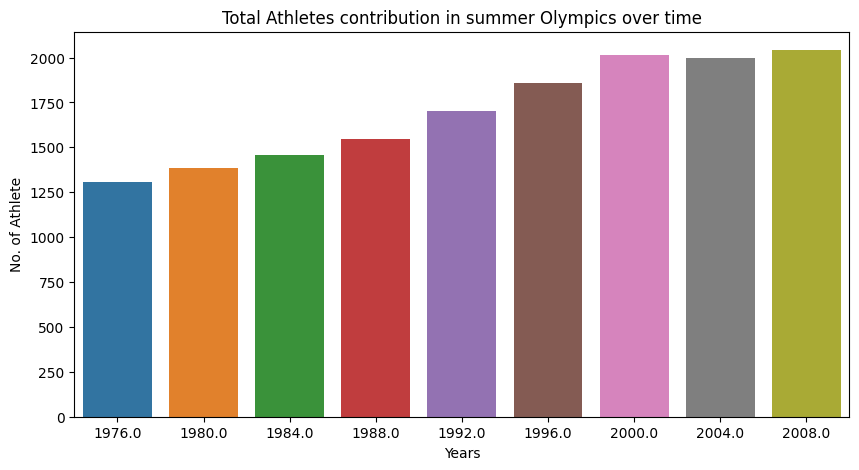

In [10]:
# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 5))

# Use Seaborn's countplot method on the DataFrame 'df' and specify the 'Year' column
sns.countplot(x='Year', data=df, ax=ax)

# Set the title and labels using the axes methods
ax.set_title('Total Athletes contribution in summer Olympics over time')
ax.set_xlabel('Years')
ax.set_ylabel('No. of Athlete')

# Show the plot
plt.show()

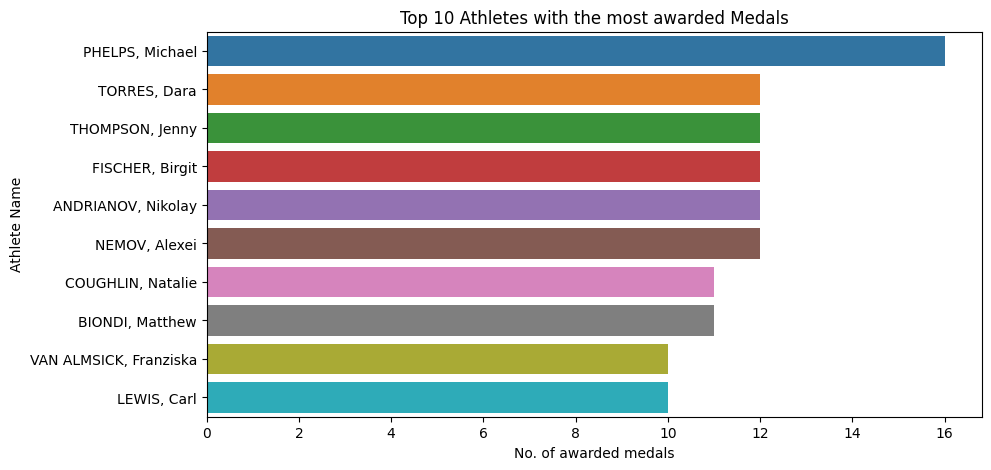

In [14]:
athlete_order = df['Athlete'].value_counts().head(10).index

# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 5))

# Use Seaborn's countplot method on the DataFrame 'df', specify the 'Athlete' column, and set the order
sns.countplot(data=df, y='Athlete', order=athlete_order, ax=ax)

# Set the title and labels using the axes methods
ax.set_title('Top 10 Athletes with the most awarded Medals')
ax.set_xlabel('No. of awarded medals')
ax.set_ylabel('Athlete Name')

# Show the plot
plt.show()

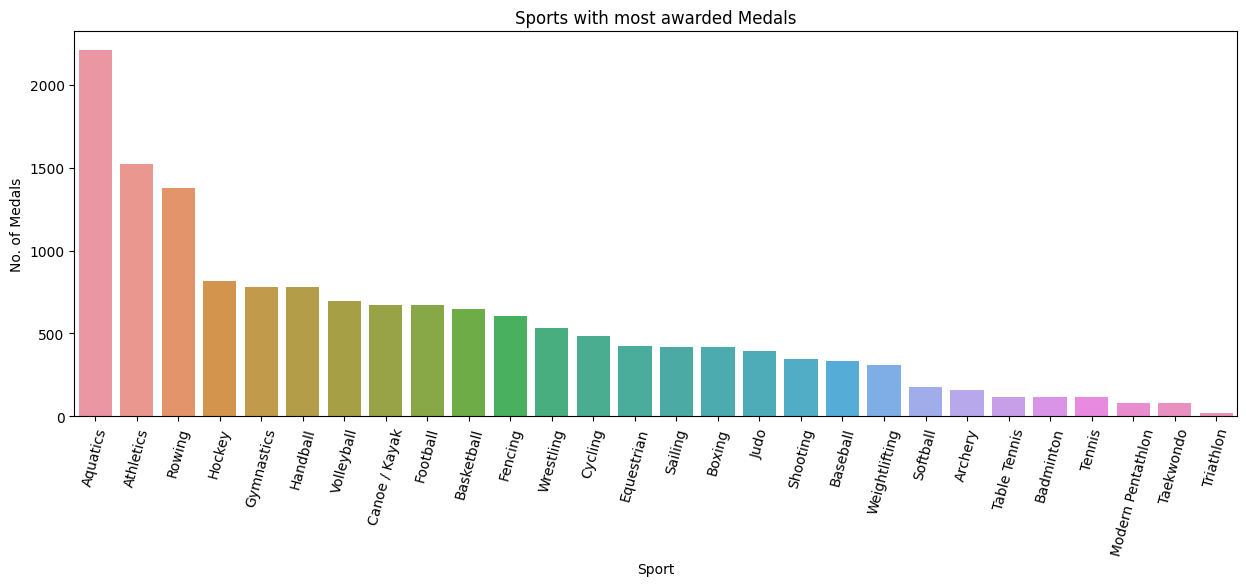

In [15]:
# Get the order of sports based on the count of medals
highest_sport = df['Sport'].value_counts().index

# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(15, 5))

# Use Seaborn's countplot method on the DataFrame 'df', specify the 'Sport' column, and set the order
sns.countplot(data=df, x='Sport', order=highest_sport, ax=ax)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

# Set the title and labels using the axes methods
ax.set_title('Sports with most awarded Medals')
ax.set_xlabel('Sport')
ax.set_ylabel('No. of Medals')

# Show the plot
plt.show()

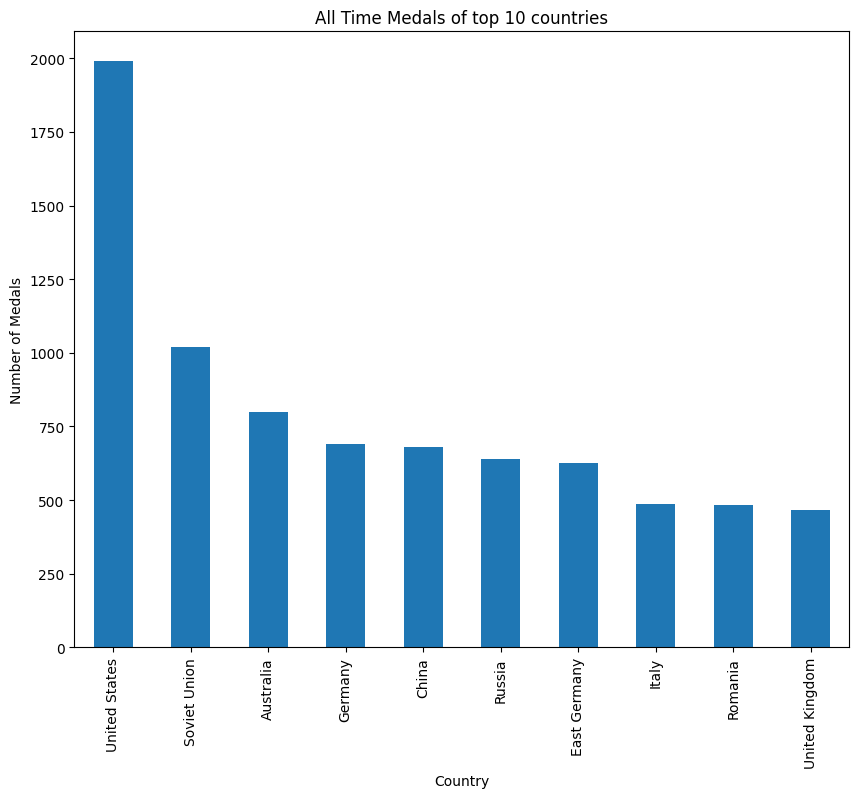

In [19]:
# Assuming 'df' is a DataFrame containing the data with the 'Country' column and the number of medals
top_10 = df['Country'].value_counts()[:10]

# Create a bar chart using Pandas and Matplotlib
top_10.plot(kind='bar', figsize=(10, 8))

plt.title('All Time Medals of top 10 countries')
plt.xlabel('Country')
plt.ylabel('Number of Medals')

plt.show()

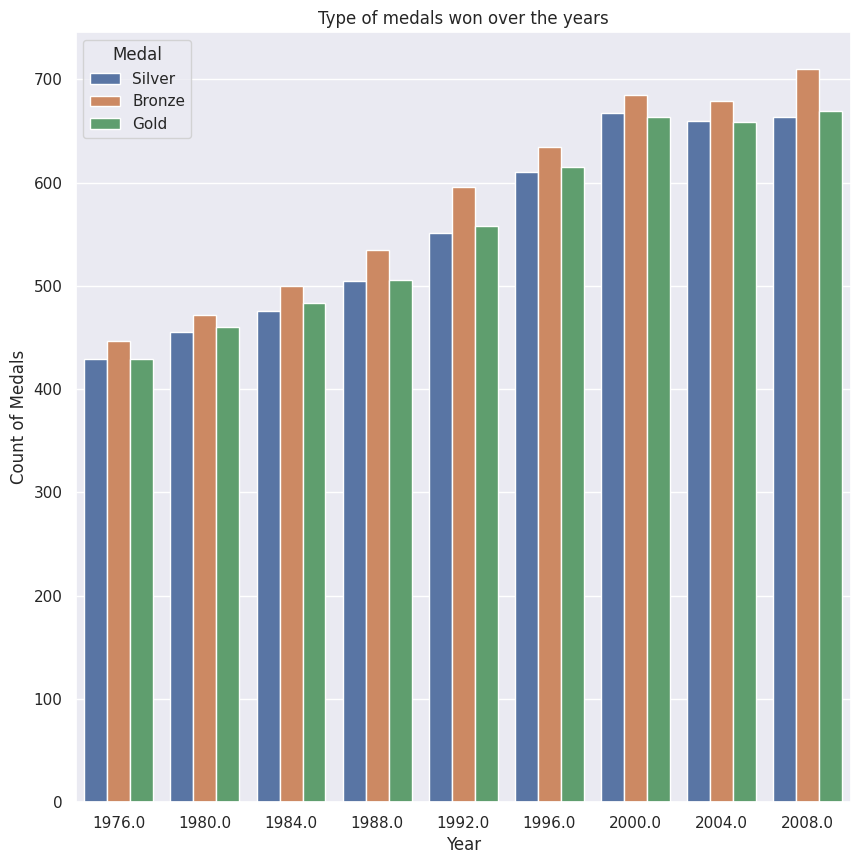

In [22]:
# Assuming 'df' is a DataFrame containing the data with the 'Year' and 'Medal' columns
fig, ax = plt.subplots(figsize=(10, 10))

# Create the countplot using Seaborn and the specified DataFrame and columns
sns.countplot(x='Year', hue='Medal', data=df, ax=ax)

# Set the title and labels using the axes methods
ax.set_title("Type of medals won over the years")
ax.set_xlabel("Year")
ax.set_ylabel("Count of Medals")

# Show the plot
plt.show()

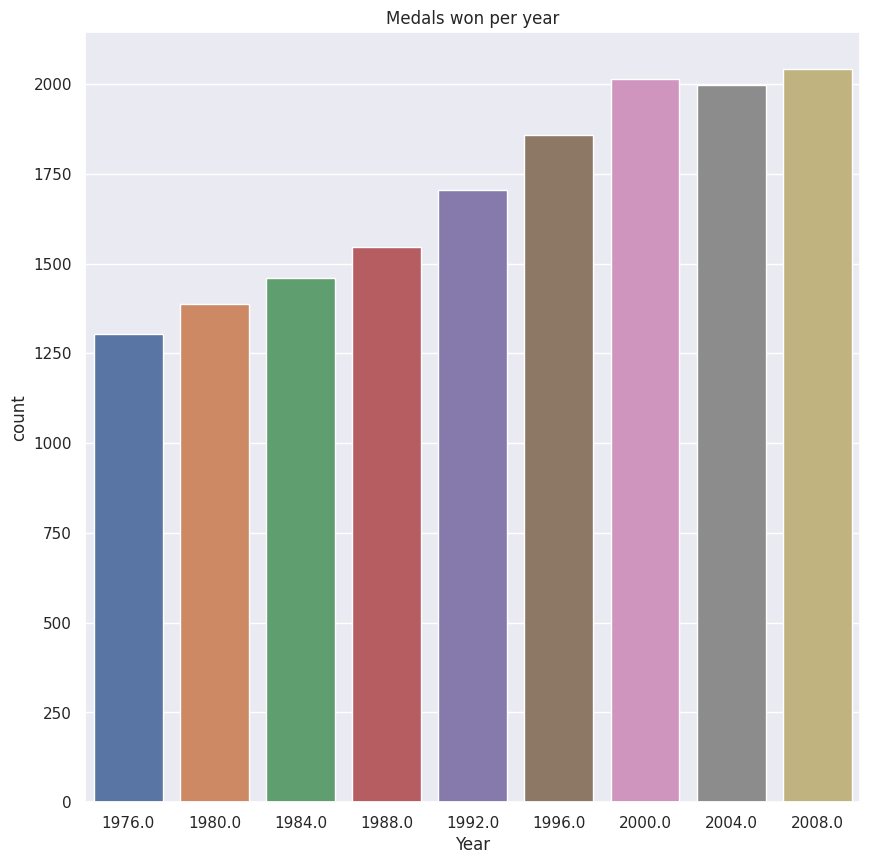

In [23]:
sns.countplot(x='Year', data=df)
plt.title("Medals won per year")
plt.show()

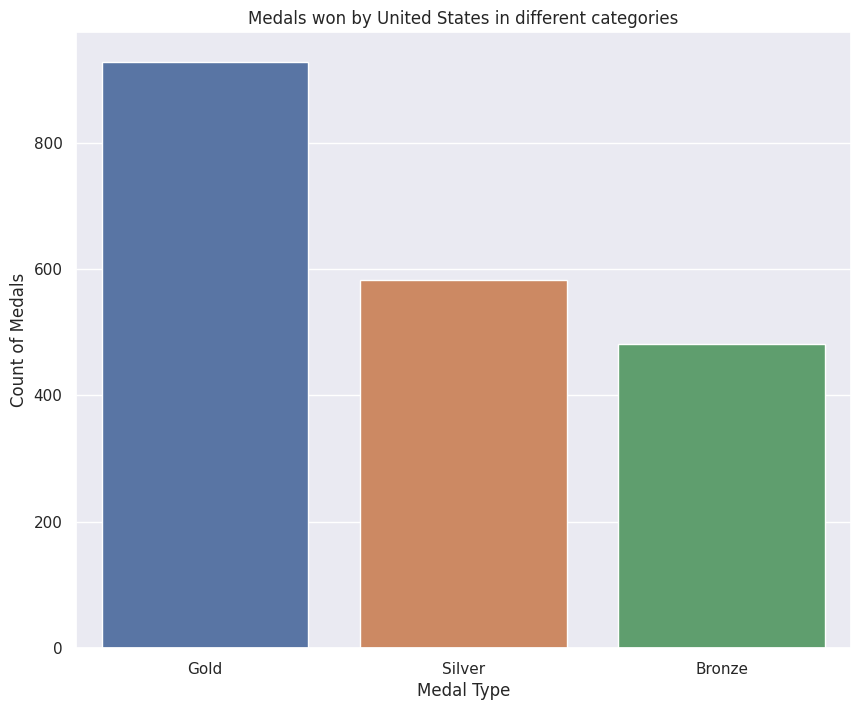

In [26]:
# Assuming 'df' is a DataFrame containing the data with the 'Country' and 'Medal' columns
usa_medals = df[df['Country'] == 'United States']['Medal'].value_counts()

# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 8))

# Use Seaborn's barplot method to create a bar chart with the specified DataFrame and column
sns.barplot(x=usa_medals.index, y=usa_medals.values, ax=ax)

# Set the title and labels using the axes methods
ax.set_title('Medals won by United States in different categories')
ax.set_xlabel('Medal Type')
ax.set_ylabel('Count of Medals')

# Show the plot
plt.show()

<Axes: xlabel='Medal', ylabel='count'>

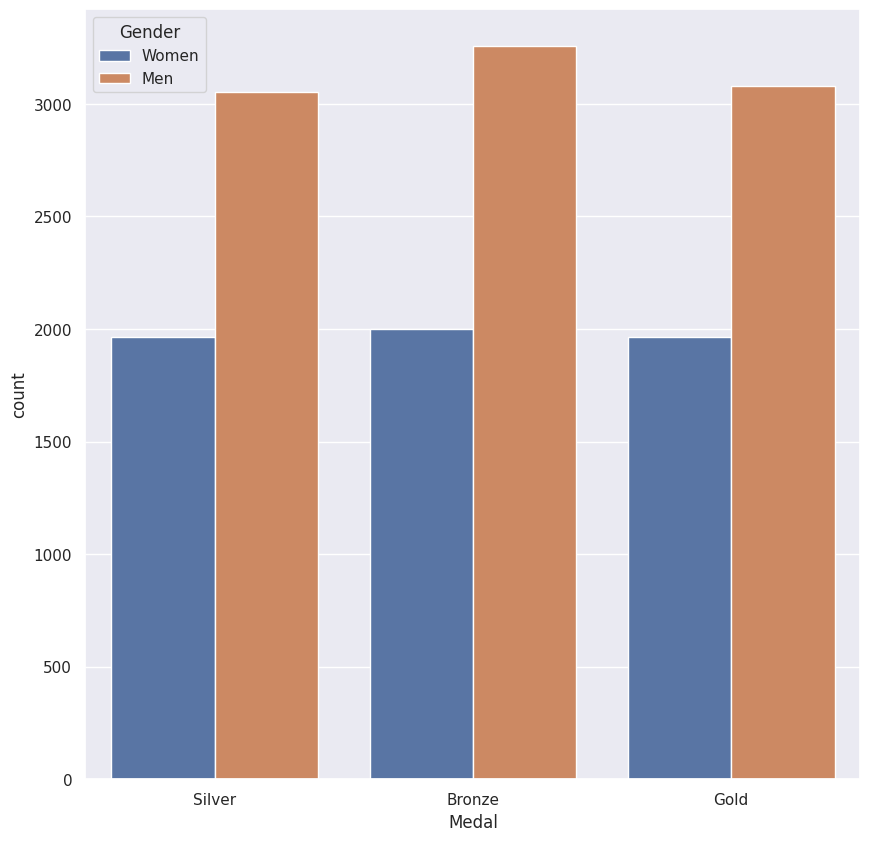

In [27]:
 sns.countplot(x="Medal", hue="Gender", data=df)

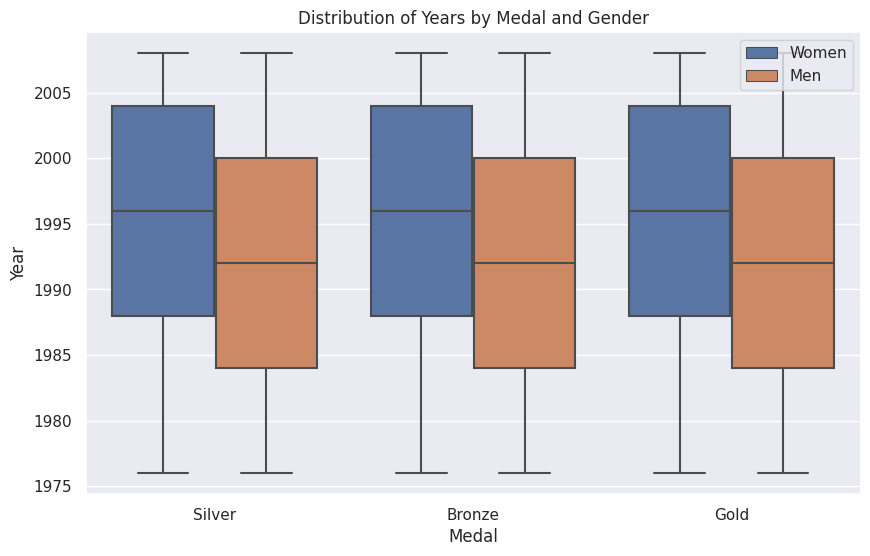

In [49]:
# Assuming 'df' is a DataFrame containing the data with the 'Medal', 'Year', and 'Gender' columns
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn's boxplot method to create a box plot with the specified DataFrame and columns
sns.boxplot(x="Medal", y="Year", hue="Gender", data=df, ax=ax)

# Set the title and labels using the axes methods
ax.set_title('Distribution of Years by Medal and Gender')
ax.set_xlabel('Medal')
ax.set_ylabel('Year')

# Show the legend in the upper right corner
ax.legend(loc='upper right')

# Show the plot
plt.show()


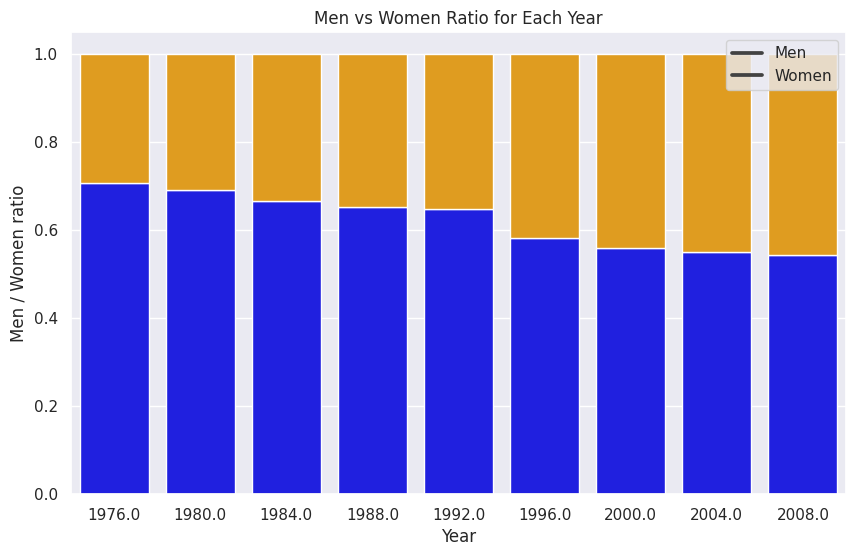

In [42]:
# Assuming 'df' is a DataFrame containing the data with the 'Year' and 'Gender' columns
gender_group = df.groupby(['Year', 'Gender']).size().unstack()

# Calculate the ratio of men to women for each year
gender_ratio = gender_group.div(gender_group.sum(axis=1), axis=0)

# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn's barplot method to create a stacked bar chart
sns.barplot(x=gender_ratio.index, y=gender_ratio['Men'], color='blue', ax=ax)
sns.barplot(x=gender_ratio.index, y=gender_ratio['Women'], color='orange', ax=ax, bottom=gender_ratio['Men'])

# Set the legend with custom labels
ax.legend(['Men', 'Women'])

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Men / Women ratio')

# Set the title
ax.set_title('Men vs Women Ratio for Each Year')

# Show the plot
plt.show()

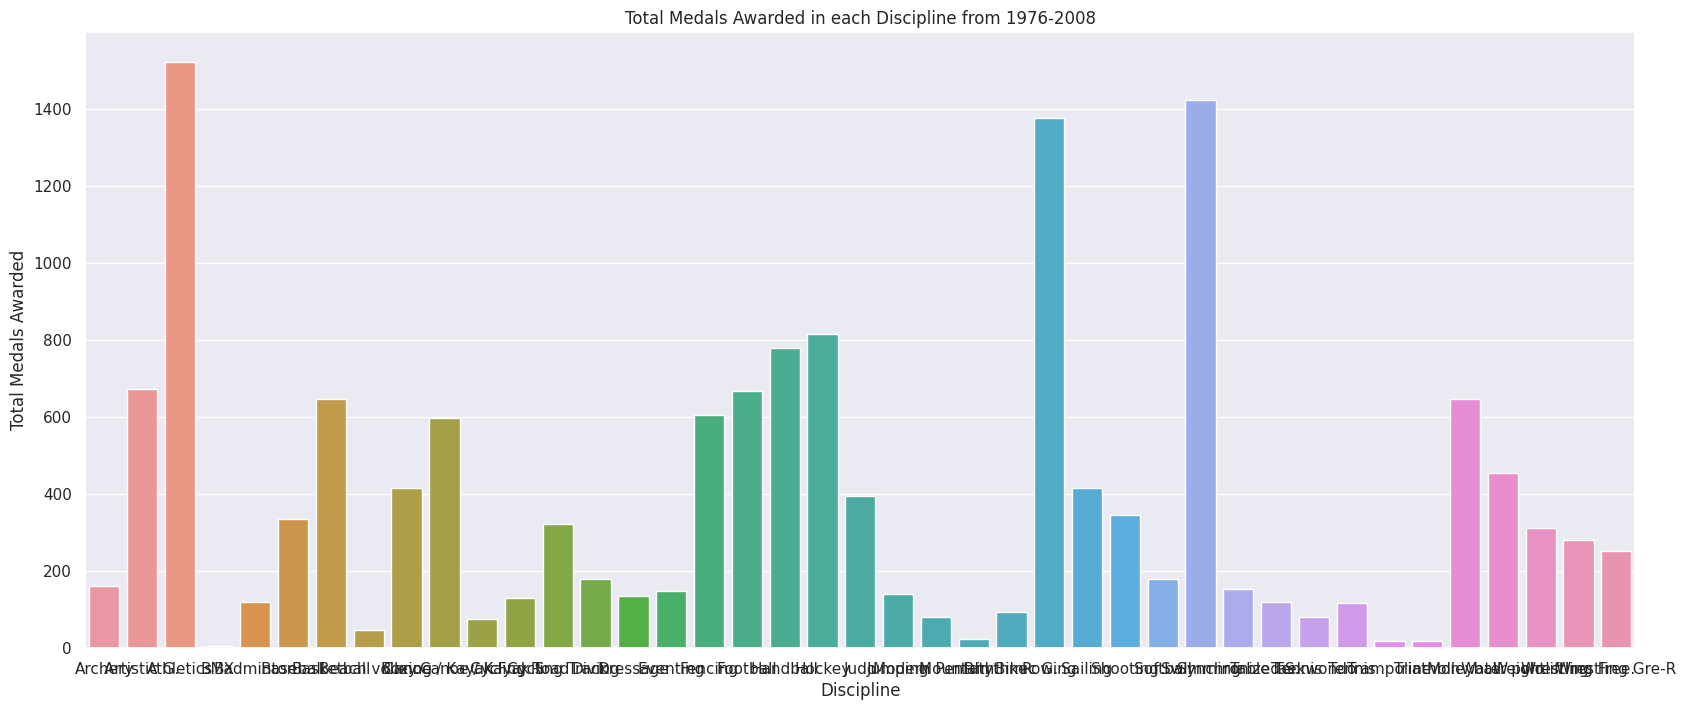

In [44]:
# Assuming 'df' is a DataFrame containing the data with the 'Discipline' and 'Medal' columns
p = df.groupby('Discipline').size()

# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(20, 8))

# Use Seaborn's barplot method to create a bar chart
sns.barplot(x=p.index, y=p.values, ax=ax)

# Set the x-axis label
ax.set_xlabel('Discipline')

# Set the y-axis label
ax.set_ylabel('Total Medals Awarded')

# Set the title
ax.set_title('Total Medals Awarded in each Discipline from 1976-2008')

# Remove the legend
ax.legend().set_visible(False)

# Show the plot
plt.show()

<ipython-input-46-bc7a260ee2ae>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


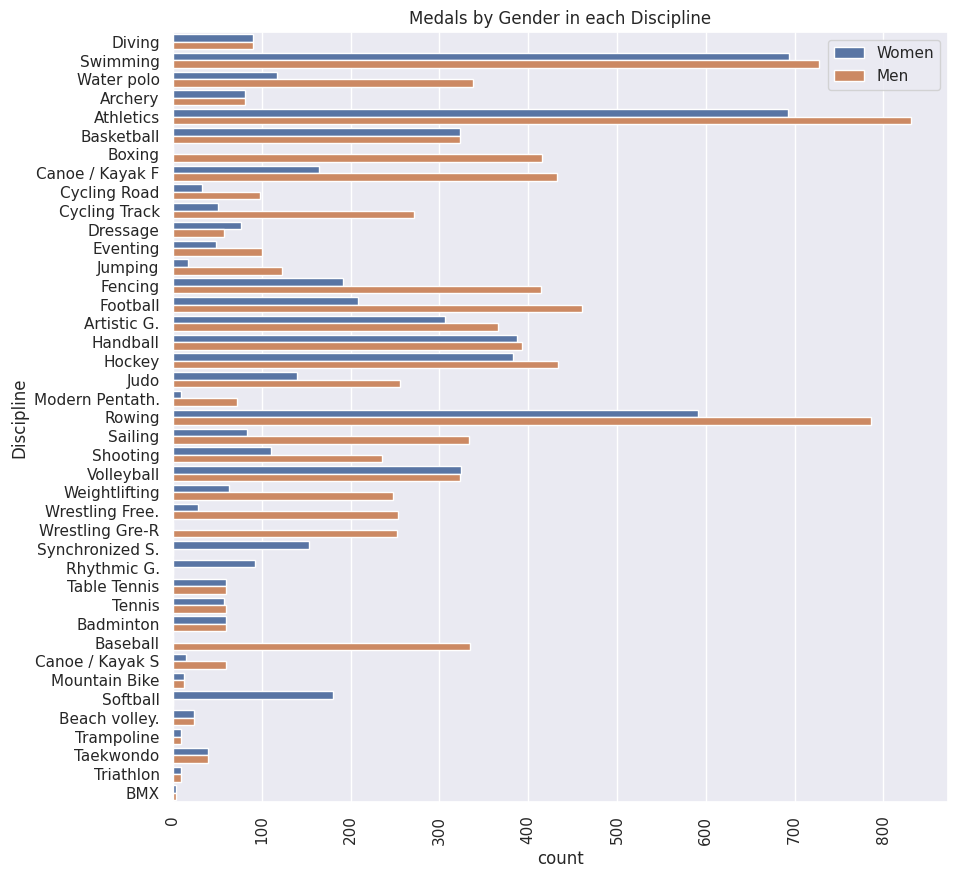

In [46]:
# Assuming 'df' is a DataFrame containing the data with the 'Discipline' and 'Gender' columns
fig, ax = plt.subplots(figsize=(10, 10))

# Use Seaborn's countplot method to create a countplot with the specified DataFrame and columns
sns.countplot(y='Discipline', hue='Gender', data=df, ax=ax)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set_title('Medals by Gender in each Discipline')

# Show the legend in the upper right corner
ax.legend(loc='upper right')

# Show the plot
plt.show()

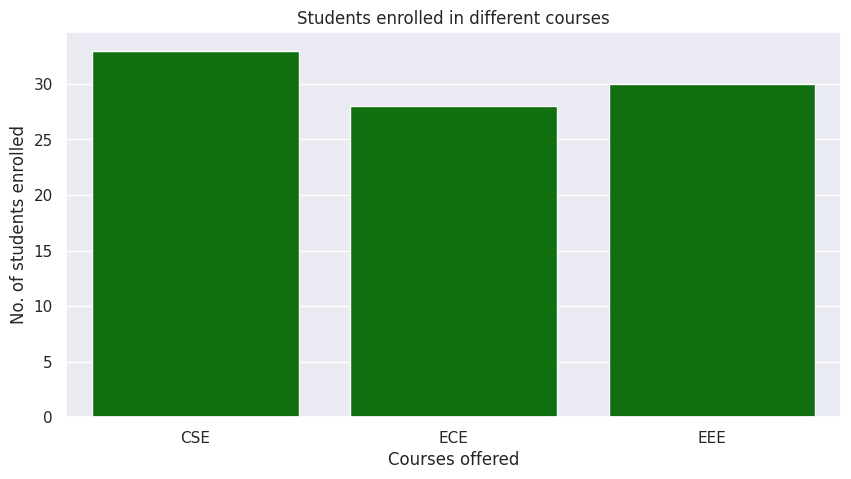

In [50]:
# Dataset generation
data_dict = {'CSE': 33, 'ECE': 28, 'EEE': 30}
df = pd.DataFrame(data_dict.items(), columns=['Courses offered', 'No. of students enrolled'])

# Create a figure and axes using Matplotlib's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot using Seaborn
sns.barplot(x='Courses offered', y='No. of students enrolled', data=df, ax=ax, color='green')

# Set the title
ax.set_title("Students enrolled in different courses")

# Show the plot
plt.show()


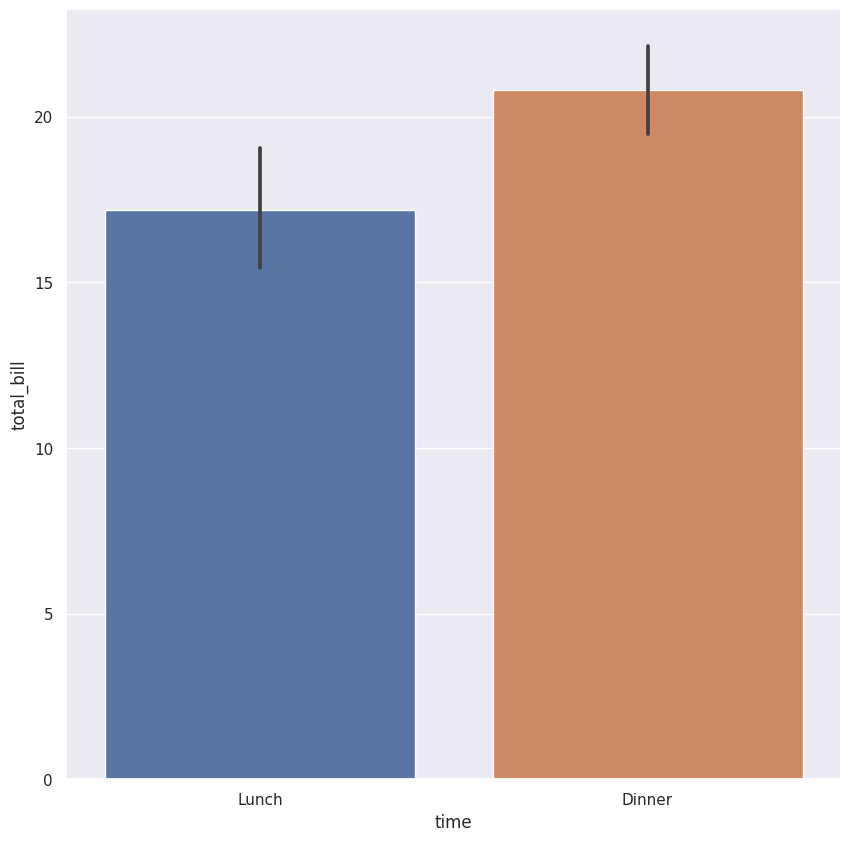

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
sns.barplot(x = 'time',
            y = 'total_bill',
            data = df)
plt.show()

In [52]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

Text(0, 0.5, 'Ratings')

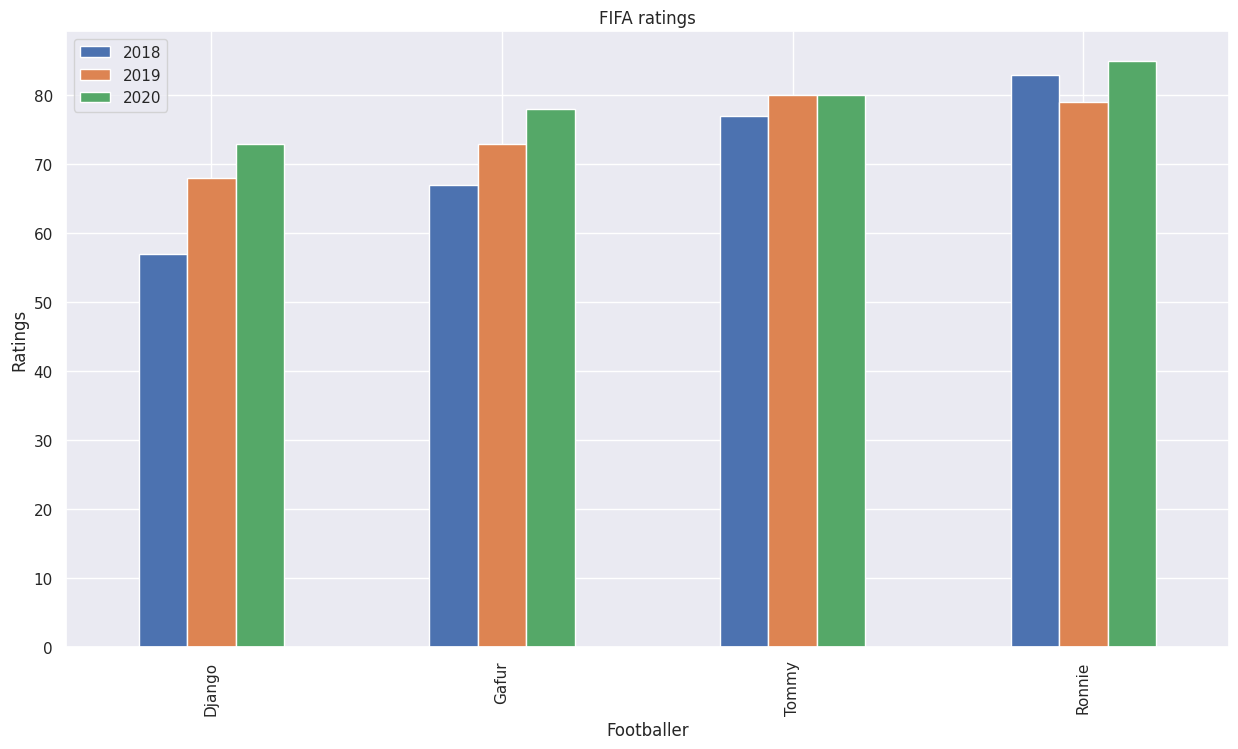

In [53]:
import pandas as pd
plotdata = pd.DataFrame({
    "2018":[57,67,77,83],
    "2019":[68,73,80,79],
    "2020":[73,78,80,85]},
    index=["Django", "Gafur", "Tommy", "Ronnie"])
plotdata.plot(kind="bar",figsize=(15, 8))
plt.title("FIFA ratings")
plt.xlabel("Footballer")
plt.ylabel("Ratings")


Text(0, 0.5, 'Ratings')

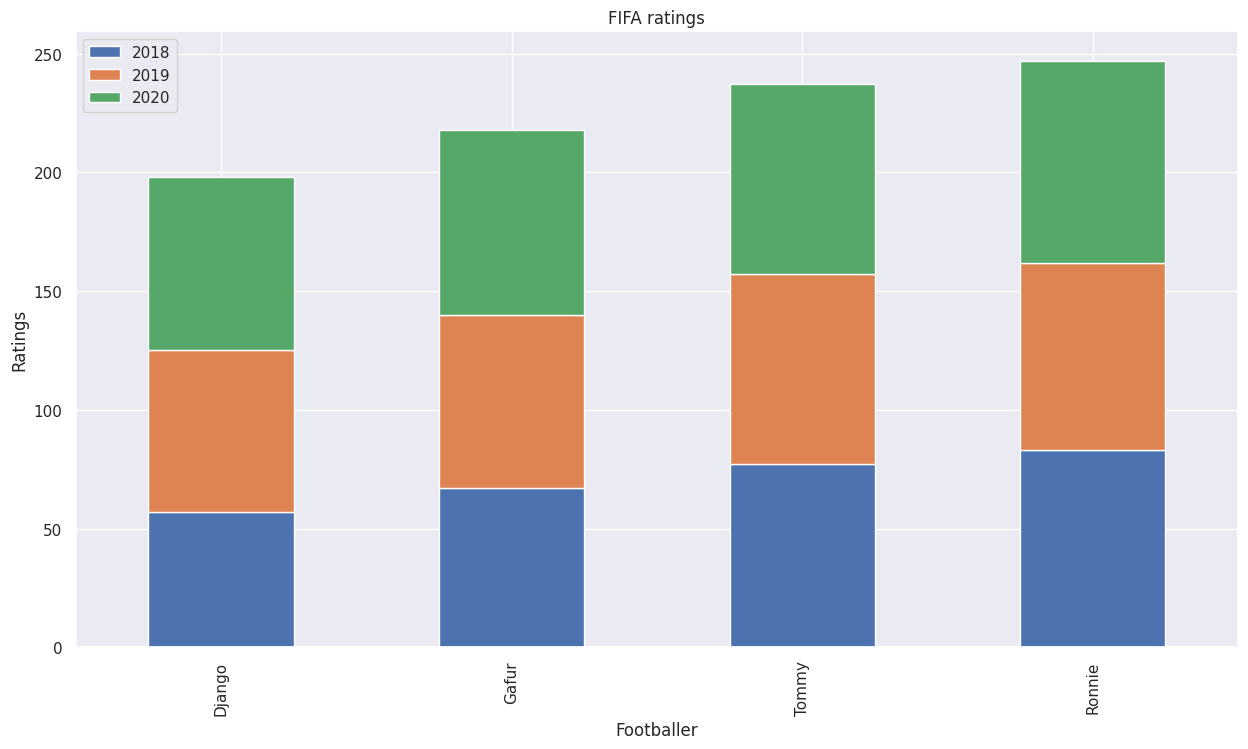

In [54]:
import pandas as pd
plotdata = pd.DataFrame({
    "2018":[57,67,77,83],
    "2019":[68,73,80,79],
    "2020":[73,78,80,85]},
    index=["Django", "Gafur", "Tommy", "Ronnie"])
plotdata.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("FIFA ratings")
plt.xlabel("Footballer")
plt.ylabel("Ratings")